# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file

/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
try:
    df = pd.read_csv('../data/checker_regression.csv')
except FileNotFoundError as e:
    print('File not found')
    raise e

print("Исходный фрейм:")
print(df.head())
# print(f"\nИнформация о данных: {df.info()}")

Исходный фрейм:
      uid  num_commits  pageviews  AVG(diff)
0  user_1           62       28.0        NaN
1  user_1           62       28.0        NaN
2  user_1           62       28.0        NaN
3  user_1           62       28.0        NaN
4  user_1           62       28.0        NaN


In [3]:
df = df.fillna(0)
df.drop_duplicates(keep='first', inplace=True)
print(f"\nПосле заполнения")
print(df.isnull().sum())

print(df.info())



После заполнения
uid            0
num_commits    0
pageviews      0
AVG(diff)      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None


In [4]:
X = df[['num_commits', 'pageviews']]
y = df['AVG(diff)']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 76
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uid          29 non-null     object 
 1   num_commits  29 non-null     int64  
 2   pageviews    29 non-null     float64
 3   AVG(diff)    29 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2)

print(f"\nTrain размер: {train_df.shape}")
print(f"Test размер: {test_df.shape}")



Train размер: (23, 4)
Test размер: (6, 4)


## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [6]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_rmse_scores.append(test_rmse)

        print(f"train - {train_rmse} | test - {test_rmse}")

    avg_rmse = np.mean(test_rmse_scores)
    print(f"Average RMSE on crossval is {avg_rmse}")

In [7]:
print("LINEAR REGRESSION")
print(f"Количество признаков: {train_df.shape[1]}")
print(f"Количество примеров: {train_df.shape[0]}")
lr = LinearRegression()
lr_rmse = crossval(10, X, y, lr)
print("_______________________________\n")

print("DECISION TREE REGRESSOR")
dt = DecisionTreeRegressor(max_depth=5, random_state=21)
dt_rmse = crossval(10, X, y, dt)
print("_______________________________\n")

print("RANDOM FOREST REGRESSOR")
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=21)
rf_rmse = crossval(10, X, y, rf)
print("_______________________________")

LINEAR REGRESSION
Количество признаков: 4
Количество примеров: 23
train - 61.35327112662008 | test - 57.85614740884658
train - 62.5462335194863 | test - 44.71218893425673
train - 61.14556371253599 | test - 83.19897138394585
train - 58.416728626194235 | test - 79.399015977114
train - 60.11026827841826 | test - 68.756146189296
train - 60.619323028395335 | test - 65.92296908962915
train - 61.72075104991357 | test - 61.800360553015715
train - 62.60680682836641 | test - 46.68994292992783
train - 55.58034321272078 | test - 99.08124434288634
train - 61.577932451061805 | test - 53.24118830442656
Average RMSE on crossval is 66.06581751133447
_______________________________

DECISION TREE REGRESSOR
train - 19.51853504928291 | test - 120.62116123233534
train - 13.810879405644846 | test - 79.5333147061541
train - 24.668873948365416 | test - 0.0
train - 24.61110834249758 | test - 78.98656472722058
train - 7.999221716949913 | test - 96.70180443756715
train - 15.988261168504463 | test - 53.9163670457

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [9]:
def plotting(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=21)
    y_pred = cross_val_predict(model, X, y, cv=kf)

    plt.scatter(y, y_pred, alpha=0.5)
    plt.xlabel('Actual Average Difference')
    plt.ylabel('Predicted Average Difference')
    plt.grid(True)
    plt.show()

In [10]:
def best_model(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

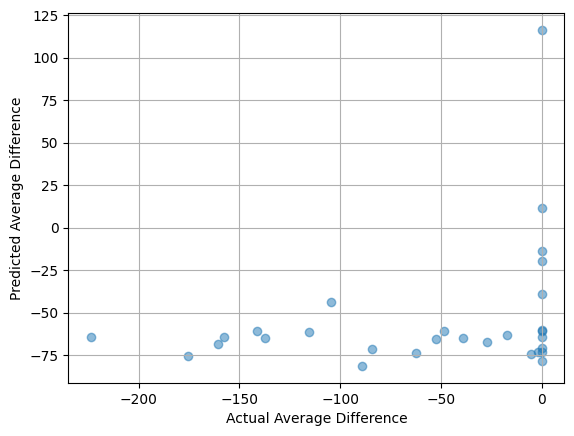

In [11]:
lr = LinearRegression()
plotting(lr)

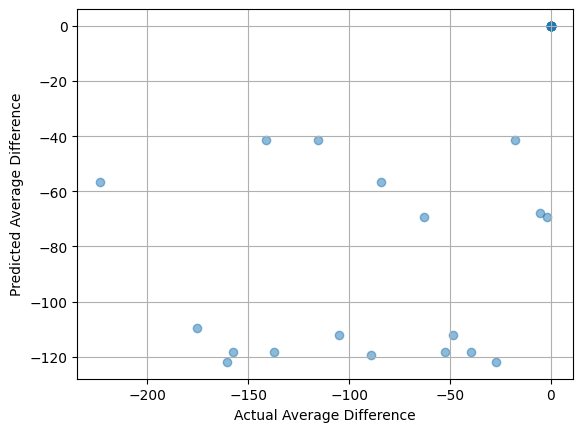

In [12]:
param_grid = {
    'max_depth': [i for i in range(1, 11)]
}
model = DecisionTreeRegressor(
    random_state=21
)
tree_model = best_model(model, param_grid)

plotting(tree_model)

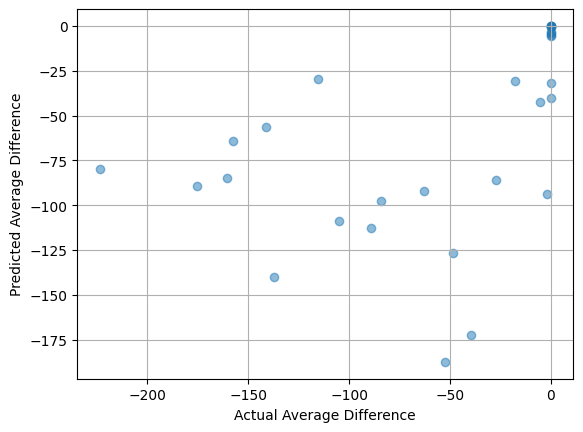

In [13]:
param_grid = {
    'max_depth': [i for i in range(15, 40, 5)],
    'n_estimators': [i for i in range(75, 151, 25)]
}
model = RandomForestRegressor(
    random_state=21,
)
rf_model = best_model(model, param_grid)

plotting(rf_model)

**Вопроc:** Как должен выглядеть идеальный график?? **Ответ:** Диагональ